In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importação dos datasets


In [77]:
df_bts = pd.read_csv('raw_files/Bts.csv')
df_test_alunos = pd.read_csv('raw_files/meds_test_alunos.csv')
df_train_alunos = pd.read_csv('raw_files/meds_train_alunos.csv')

Tratamento de dados inicial

In [78]:
#renomeando colunas para um padrão, para facilitar o entendimento do dataset.

df_bts.rename(columns = {'grupo': 'id_localizacao_setor', 'btsId': 'id_bts', 'btsNetNome': 'nom_bts', 'lat': 'num_lat_bts', 'lon': 'num_long_bts', 'cch': 'nom_canal_controle_bts', 'azimuth': 'num_azimuth', 'RssiId': 'id_rrsi'}, inplace=True)
df_test_alunos.rename(columns = {'ponto_id':'id_ponto'}, inplace=True)
df_train_alunos.rename(columns = {'ponto_id':'id_ponto'}, inplace=True)

Identificação de proporção de nulos e a tipagem dos dados

In [79]:
df_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_localizacao_setor    9 non-null      int64  
 1   id_bts                  9 non-null      object 
 2   nom_bts                 9 non-null      object 
 3   num_lat_bts             9 non-null      float64
 4   num_long_bts            9 non-null      float64
 5   nom_canal_controle_bts  9 non-null      int64  
 6   num_azimuth             9 non-null      int64  
 7   id_rrsi                 9 non-null      object 
dtypes: float64(2), int64(3), object(3)
memory usage: 708.0+ bytes


In [80]:
df_test_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id_ponto  2904 non-null   int64  
 1   rssi_1_1  2904 non-null   float64
 2   rssi_1_2  2904 non-null   float64
 3   rssi_1_3  2904 non-null   float64
 4   rssi_2_1  2904 non-null   float64
 5   rssi_2_2  2904 non-null   float64
 6   rssi_2_3  2904 non-null   float64
 7   rssi_3_1  2904 non-null   float64
 8   rssi_3_2  2904 non-null   float64
 9   rssi_3_3  2904 non-null   float64
 10  delay_1   2904 non-null   float64
 11  delay_2   2904 non-null   float64
 12  delay_3   2904 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 295.1 KB


In [81]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id_ponto  6775 non-null   int64  
 1   rssi_1_1  6775 non-null   float64
 2   rssi_1_2  6775 non-null   float64
 3   rssi_1_3  6775 non-null   float64
 4   rssi_2_1  6775 non-null   float64
 5   rssi_2_2  6775 non-null   float64
 6   rssi_2_3  6775 non-null   float64
 7   rssi_3_1  6775 non-null   float64
 8   rssi_3_2  6775 non-null   float64
 9   rssi_3_3  6775 non-null   float64
 10  delay_1   6775 non-null   float64
 11  delay_2   6775 non-null   float64
 12  delay_3   6775 non-null   float64
 13  lat       6775 non-null   float64
 14  lon       6775 non-null   float64
 15  indoor    6775 non-null   bool   
dtypes: bool(1), float64(14), int64(1)
memory usage: 800.7 KB


Verificação de dados duplicados


In [82]:
df_train_alunos[df_train_alunos.duplicated()]

,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor


In [83]:
df_test_alunos[df_test_alunos.duplicated()]

,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3


Análise de Medidas Estatísticas

In [84]:
df_train_alunos.describe()

,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,4856.099779,-100.789923,-105.688802,-100.545198,-103.524786,-97.210290,-97.193499,-93.644749,-93.353728,-107.478361,4.679410,3.159262,2.504945,-8.054510,-34.951792
std,2785.645694,10.025728,10.397924,9.968138,13.367328,8.853480,9.992950,7.688089,8.110877,11.003407,0.911469,1.009927,1.095094,0.002388,0.002310
min,1.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-113.140000,-115.630000,-115.000000,1.000000,0.000000,0.000000,-8.059550,-34.959850
25%,2434.500000,-107.650000,-115.000000,-107.148571,-115.000000,-102.202857,-101.652857,-99.480000,-99.005000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,4875.000000,-103.040000,-110.425000,-99.750000,-108.430000,-97.170000,-95.615714,-94.785000,-95.688000,-115.000000,5.000000,3.000000,2.000000,-8.055494,-34.951597
75%,7272.500000,-93.455000,-97.350000,-93.340000,-96.817917,-92.080000,-91.951429,-89.375000,-89.610500,-97.600000,5.000000,3.000000,3.000000,-8.055310,-34.951331
max,9676.000000,-61.380000,-64.820000,-60.640000,-36.960000,-59.170000,-56.980000,-56.060000,-55.870000,-52.540000,8.000000,7.000000,7.000000,-8.046420,-34.945110


Análise da variável indoor

In [85]:
# Configuração  de estilo do Seaborn
sns.set(style="whitegrid")

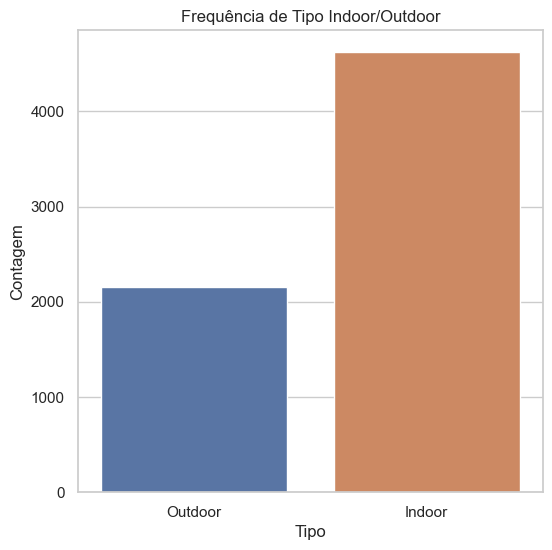

In [86]:
#Gráfico de barras que mostra a frequência dos diferentes tipos (indoor e outdoor)

# Contagem de valores únicos em 'indoor'
indoor_count = df_train_alunos['indoor'].value_counts()

# Plot de gráfico de barra
plt.figure(figsize=(6, 6))
sns.barplot(x=indoor_count.index, y=indoor_count.values)
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Frequência de Tipo Indoor/Outdoor')
plt.xticks([0, 1], ['Outdoor', 'Indoor'])
plt.show()


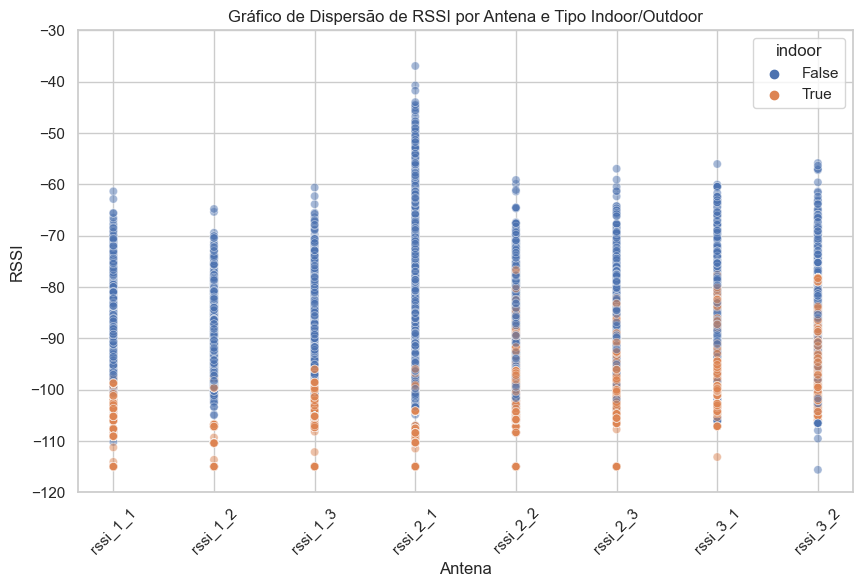

In [87]:
#O intuito do gráfico é a visualização da tendência do RSSI ao longo das antenas, e entendermos a correlação entre o valor do RSSI e a variável  indoor



# Derreter as colunas de RSSI e incluir a coluna 'indoor'
df_melted = df_train_alunos.melt(id_vars=['indoor'], value_vars=columns[:-1], value_name='RSSI', var_name='Antena')

# Configurar o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

# Plot do gráfico de dispersão para todos os pontos individuais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Antena', y='RSSI', hue='indoor', data=df_melted, alpha=0.5)
plt.xlabel('Antena')
plt.ylabel('RSSI')
plt.title('Gráfico de Dispersão de RSSI por Antena e Tipo Indoor/Outdoor')
plt.xticks(rotation=45)
plt.ylim(-120, -30)  # Ajustar o intervalo do eixo y
plt.show()

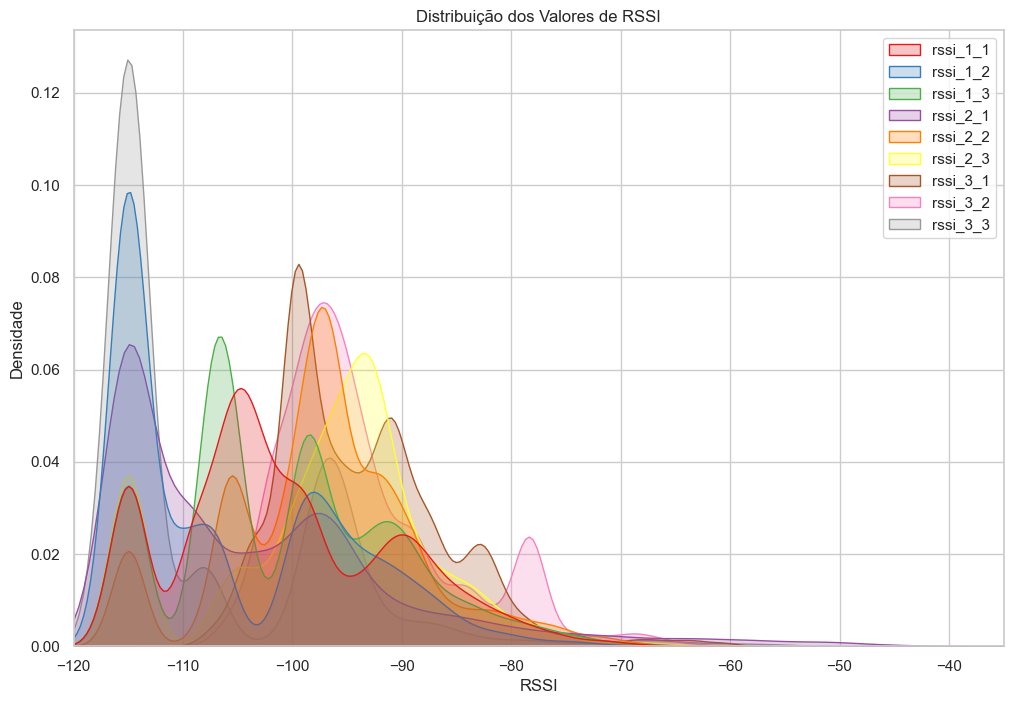

In [88]:
#Gráfico de distribuição feito para entendermos melhor a distribuição dos dados, para tentarmos identificar tendências centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
data_selected = df_train_alunos[columns]

# Plot da distribuição dos valores de RSSI com KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data_selected, fill=True, common_norm=False, palette="Set1")
plt.xlabel('RSSI')
plt.ylabel('Densidade')
plt.title('Distribuição dos Valores de RSSI')

# Ajustar o intervalo do eixo x
plt.xlim(-120, -35)

plt.show()

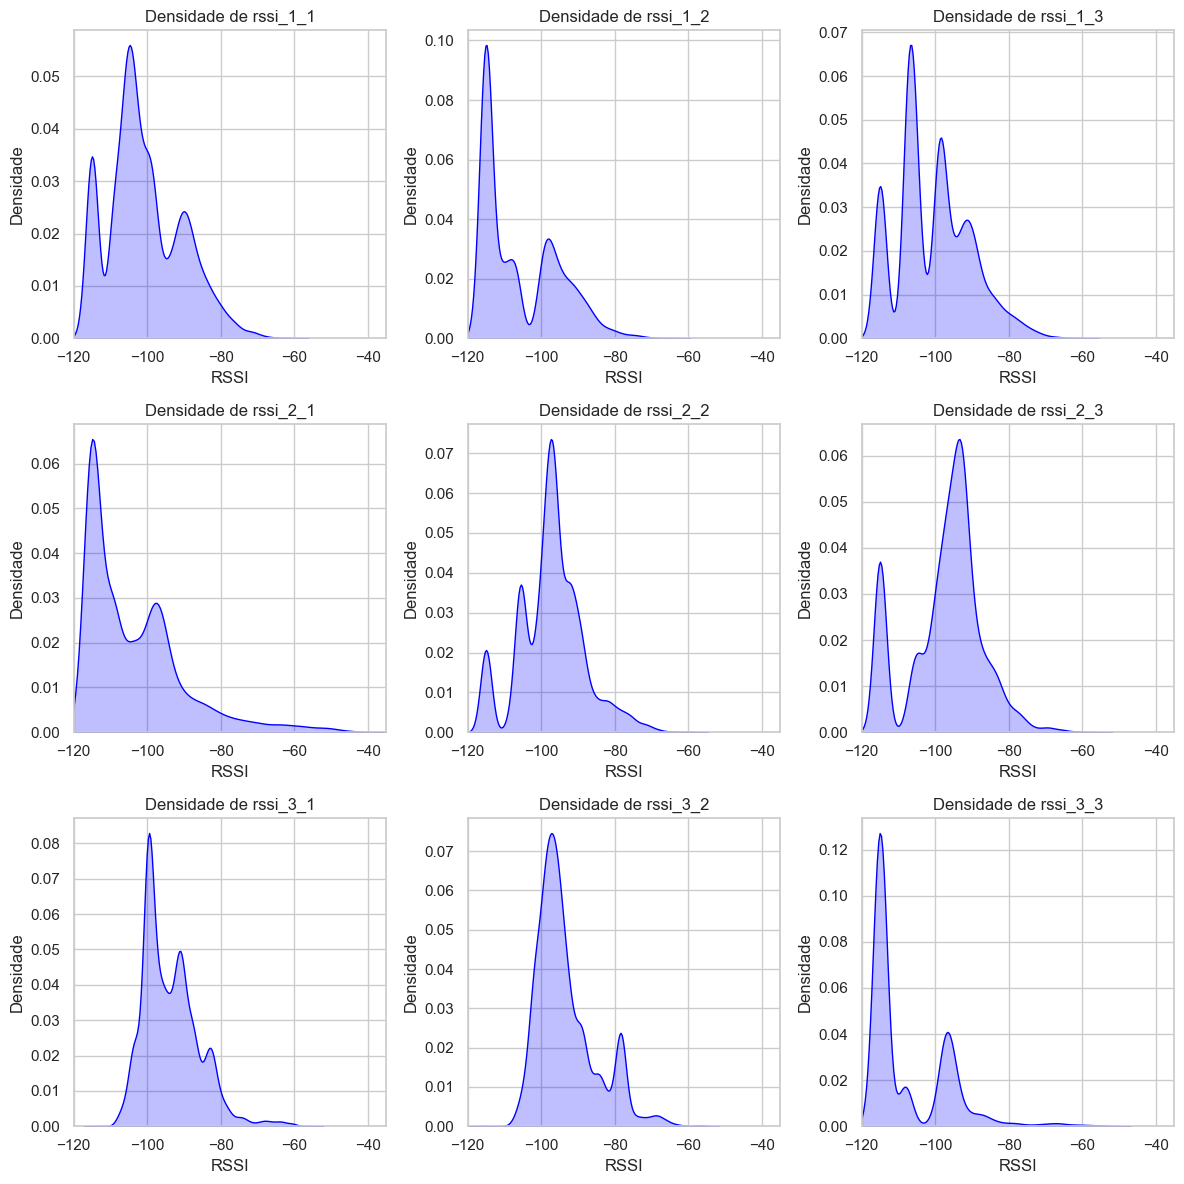

In [89]:
#Gráfico de distribuição feito para entendermos melhor a distribuição dos dados, para tentarmos identificar tendências centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
data_selected = df_train_alunos[columns]

# Configurar o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

# Criar uma grade de subplots para os gráficos de densidade
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Iterar sobre as colunas de RSSI e criar um gráfico de densidade em cada sublot
for col, ax in zip(data_selected.columns, axes.ravel()):
    sns.kdeplot(data=data_selected[col], ax=ax, fill=True, common_norm=False, color="blue")
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Densidade')
    ax.set_title(f'Densidade de {col}')
    ax.set_xlim(-120, -35)  # Ajustar o intervalo do eixo x

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

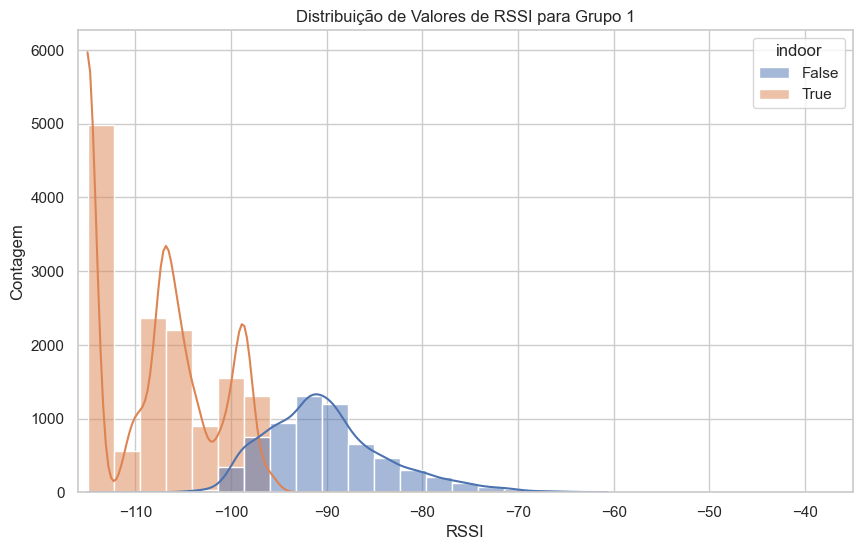

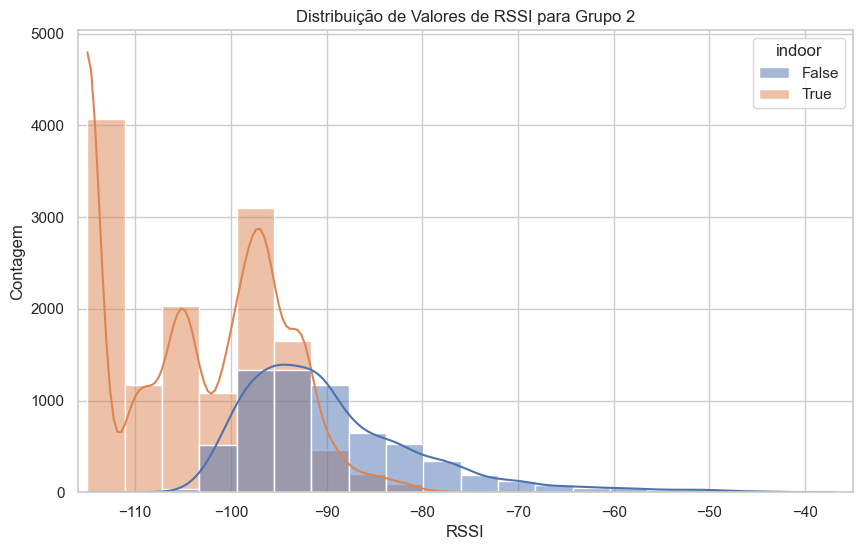

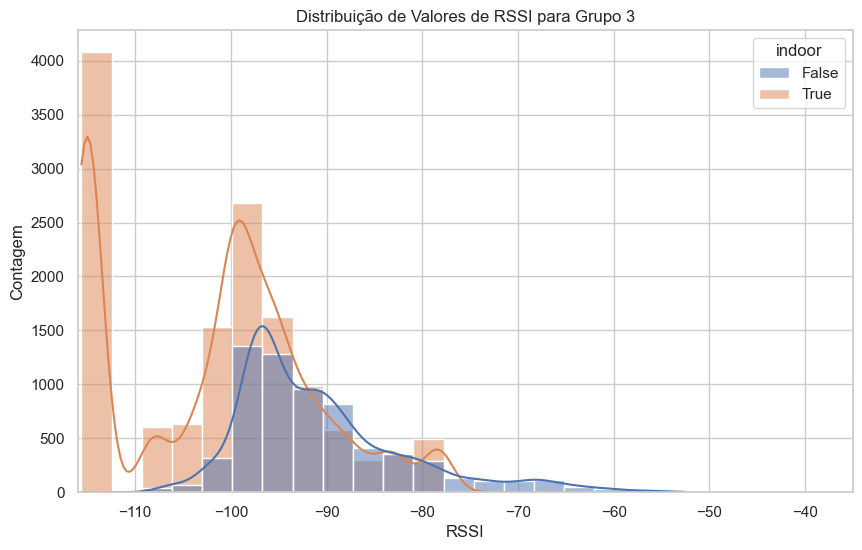

In [93]:
# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Gerar gráficos de distribuição para cada grupo
for group_name, group_columns in group_mapping.items():
    df_group = df_train_alunos.melt(id_vars=['indoor'], value_vars=group_columns, value_name='RSSI', var_name='Antena')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_group, x='RSSI', hue='indoor', bins=20, kde=True)
    plt.xlabel('RSSI')
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de Valores de RSSI para {group_name}')

    plt.xlim(-116, -35)  # Ajustar o intervalo do eixo x
    plt.show()